## Introduction
   The Dataset used here is **Fashion MNIST Dataset** of $60,000\ 28*28$ grayscale images of $10$ fashion categories, along with a test set of $10,000$ images.



| Label                           | Description        |
|---------------------------------|:-------------------|
| 0                               | T-shirt/top        |
| 1                               | Trouser            |
| 2                               | Pullover           |
| 3                               | Dress              |
| 4                               | Coat               |
| 5                               | Sandal             |
| 6                               | Shirt              |
| 7                               | Sneaker            |
| 8                               | Bag                |
| 9                               | Ankle boot         |

## Import Libraries
The library used here is TensorFlow and Numpy. The data is loaded from Keras.

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [103]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Finding out the dimensions of train and test data using *shape* attribute.

In [104]:
print("train_images:", x_train.shape)
print("test_images:", x_test.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


Normalizing the data so they are on the same scale by dividing them by $255$

In [105]:
train_images = x_train / 255.0
test_images = x_test / 255.0

# Black Box Implementation

Deciding the no. of layers and activation functions. Here, the no. of layers taken is 3. The input is *flattened* from 2D (28x28) to 1D (784).

In [106]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


Compiling the model with loss function as *Categorial Crossentropy* and using *Adam Optimizer*.

In [107]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training the model by fitting it to the training data.

In [108]:
history = model.fit(train_images, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5134 - accuracy: 0.8148 - val_loss: 0.4159 - val_accuracy: 0.8492
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3774 - accuracy: 0.8600 - val_loss: 0.3648 - val_accuracy: 0.8623
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3368 - accuracy: 0.8755 - val_loss: 0.3512 - val_accuracy: 0.8708
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3140 - accuracy: 0.8849 - val_loss: 0.3259 - val_accuracy: 0.8806
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2954 - accuracy: 0.8899 - val_loss: 0.3694 - val_accuracy: 0.8688
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2793 - accuracy: 0.8953 - val_loss: 0.3321 - val_accuracy: 0.8813
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2706 - accuracy: 0.9003 - val_loss: 0.3295 - val_accuracy:

Evaluating the performance of the model on the test data.

In [109]:
test_loss, test_acc = model.evaluate(test_images, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8818


The Accuracy is $88\%$ and the Loss is $0.34$.

In [89]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 885us/step


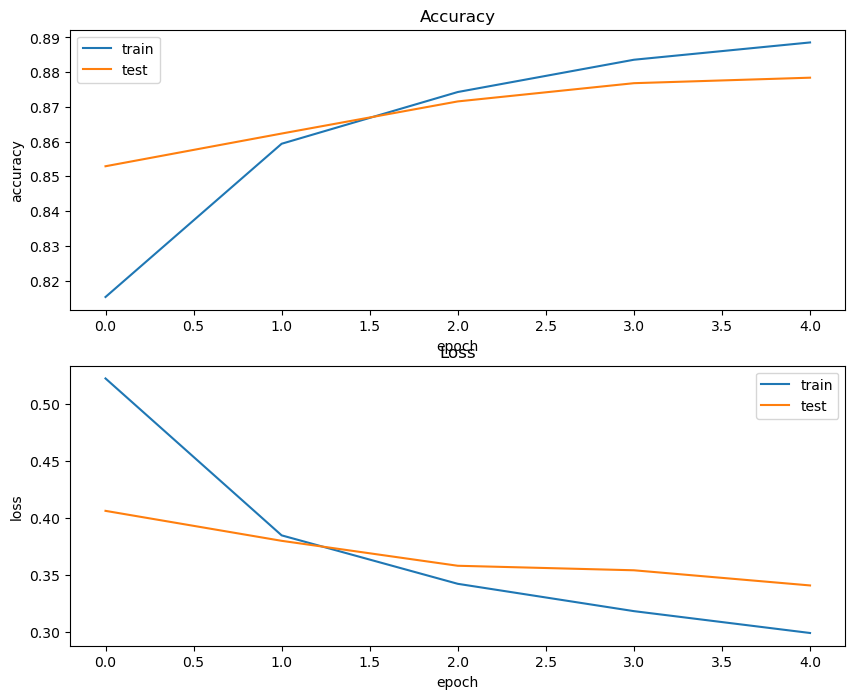

In [91]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

'Trouser'

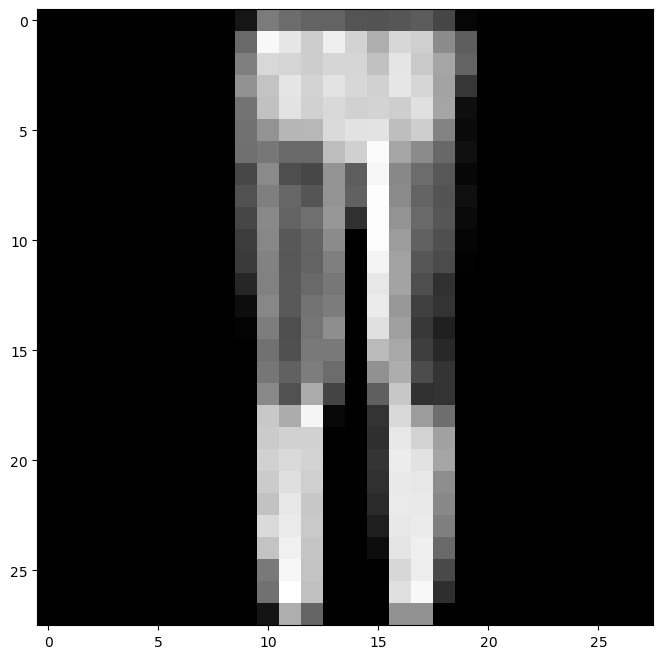

In [92]:
plt.imshow(x_test[3].reshape(28, 28))
class_names[predictions[3].argmax()]

# White Box Implementation

In [93]:
x_train = np.reshape(x_train, [60000, 784])
x_test = np.reshape(x_test, [10000, 784])

In [94]:
m_train = 59000
m_validation = 1000
m_test = x_test.shape[0]

mask = list(range(m_train, m_train + m_validation))
X_val = x_train[mask]
y_val = y_train[mask]

mask = list(range(m_train))
X_train = x_train[mask]
y_train = y_train[mask]

mask = list(range(m_test))
X_test = x_test[mask]
y_test = y_test[mask]

In [95]:
X_train = X_train.reshape(m_train, -1)
X_val = X_val.reshape(m_validation, -1)
X_test = X_test.reshape(m_test, -1)

In [96]:
X_test.shape

(10000, 784)

In [97]:
class TwoLayerNet(object):


    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros((1, hidden_size))
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros((1, output_size))

    def ReLU(x):
        return np.maximum(0, x)

    def loss(self, X, y=None, reg=0.0):
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape

        scores = None
        h1 = ReLU(np.dot(X, W1) + b1)
        out = np.dot(h1, W2) + b2
        scores = out

        if y is None:
            return scores

        scores_max = np.max(scores, axis=1, keepdims=True)  # (N,1)
        exp_scores = np.exp(scores - scores_max)  # (N,C)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # (N,C)
        correct_logprobs = -np.log(probs[range(N), y])  # (N,1)
        data_loss = np.sum(correct_logprobs) / N
        reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2)
        loss = data_loss + reg_loss

        grads = {}
        dscores = probs  # (N,C)
        dscores[range(N), y] -= 1
        dscores /= N
        dW2 = np.dot(h1.T, dscores)  # (H,C)
        db2 = np.sum(dscores, axis=0, keepdims=True)  # (1,C)
        dh1 = np.dot(dscores, W2.T)  # (N,H)
        dh1[h1 <= 0] = 0
        dW1 = np.dot(X.T, dh1)  # (D,H)
        db1 = np.sum(dh1, axis=0, keepdims=True)  # (1,H)
        dW2 += reg * W2
        dW1 += reg * W1

        grads['W1'] = dW1
        grads['b1'] = db1
        grads['W2'] = dW2
        grads['b2'] = db2

        return loss, grads


    def train(self, X, y, X_val, y_val, learning_rate=1e-3,
              learning_rate_decay=0.95, reg=1e-5, mu=0.9, num_epochs=10,
              mu_increase=1.0, batch_size=200, verbose=False):
        num_train = X.shape[0]
        iterations_per_epoch = max(int(num_train / batch_size), 1)

        v_W2, v_b2 = 0.0, 0.0
        v_W1, v_b1 = 0.0, 0.0
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        for it in range(1, num_epochs * iterations_per_epoch + 1):
            X_batch = None
            y_batch = None

            sample_index = np.random.choice(num_train, batch_size, replace=True)
            X_batch = X[sample_index, :]
            y_batch = y[sample_index]

            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)

            v_W2 = mu * v_W2 - learning_rate * grads['W2']
            self.params['W2'] += v_W2
            v_b2 = mu * v_b2 - learning_rate * grads['b2']
            self.params['b2'] += v_b2
            v_W1 = mu * v_W1 - learning_rate * grads['W1']
            self.params['W1'] += v_W1
            v_b1 = mu * v_b1 - learning_rate * grads['b1']
            self.params['b1'] += v_b1

            if verbose and it % iterations_per_epoch == 0:
                epoch = it / iterations_per_epoch
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)
                print("epoch %d / %d: loss %f, train_acc: %f, val_acc: %f" %
                      (epoch, num_epochs, loss, train_acc, val_acc))

                learning_rate *= learning_rate_decay
                mu *= mu_increase

        return {
            'loss_history': loss_history,
            'train_acc_history': train_acc_history,
            'val_acc_history': val_acc_history,
        }


    def predict(self, X):
        y_pred = None
        h1 = ReLU(np.dot(X, self.params['W1']) + self.params['b1'])
        scores = np.dot(h1, self.params['W2']) + self.params['b2']
        y_pred = np.argmax(scores, axis=1)

        return y_pred




In [98]:
input_size = X_train.shape[1]
hidden_size = 128
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
                  num_epochs=10, batch_size=1024,
                  learning_rate=7.5e-4, learning_rate_decay=0.95,
                  reg=1.0, verbose=True)

test_acc = (net.predict(X_test) == y_test).mean()
print(f"test_acc: {test_acc}, test_loss: {test_loss}")

epoch 1 / 10: loss 0.808858, train_acc: 0.782227, val_acc: 0.783000
epoch 2 / 10: loss 0.653605, train_acc: 0.861328, val_acc: 0.846000
epoch 3 / 10: loss 0.561875, train_acc: 0.853516, val_acc: 0.853000
epoch 4 / 10: loss 0.574215, train_acc: 0.853516, val_acc: 0.851000
epoch 5 / 10: loss 0.569909, train_acc: 0.847656, val_acc: 0.857000
epoch 6 / 10: loss 0.535166, train_acc: 0.850586, val_acc: 0.834000
epoch 7 / 10: loss 0.508173, train_acc: 0.875000, val_acc: 0.852000
epoch 8 / 10: loss 0.501263, train_acc: 0.865234, val_acc: 0.839000
epoch 9 / 10: loss 0.531667, train_acc: 0.873047, val_acc: 0.855000
epoch 10 / 10: loss 0.541161, train_acc: 0.872070, val_acc: 0.861000
test_acc: 0.8548, test_loss: 0.36498722434043884


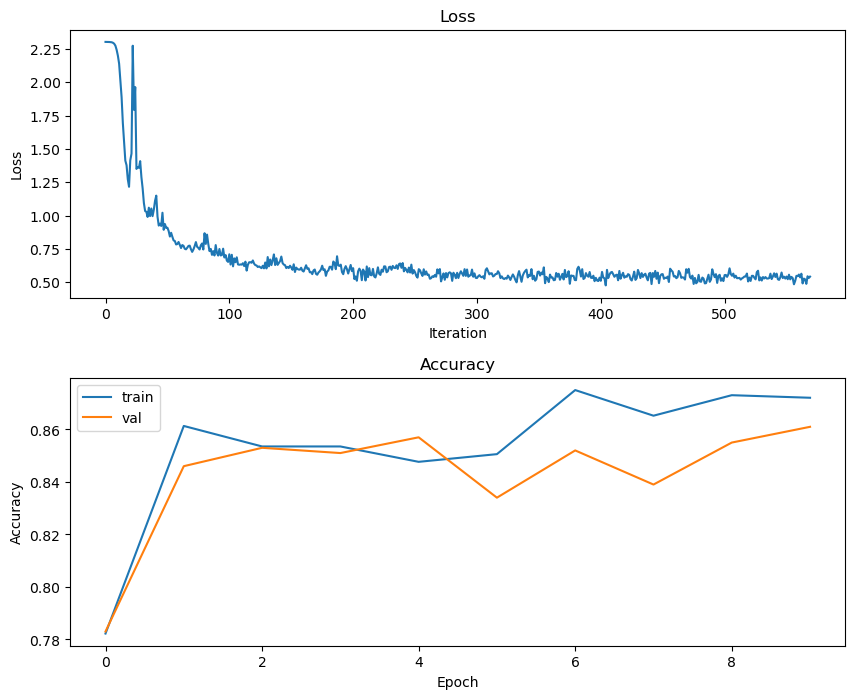

In [99]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.subplots_adjust(wspace =0, hspace =0.3)


plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

'T-shirt/top'

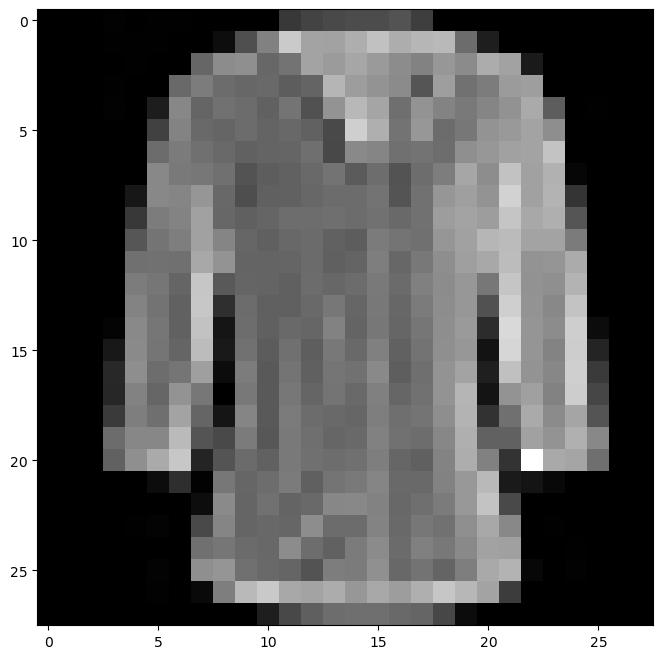

In [100]:
plt.imshow(x_test[4].reshape(28, 28))
class_names[net.predict(x_test[4]).argmax()]

# Results

## Black Box Model:
hidden_layers: $2 (128, 64)$
epochs: $10$
test_acc: $88\%$
test_loss: $0.3341$
<br>
## White Box Model:
hidden_layers: $1 (128)$
epochs: $10$
test_acc: $85\%$
test_loss: $0.3649$